file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\GeometricWeather\\GeometricWeatherclass.csv' mode='r' encoding='UTF8'>


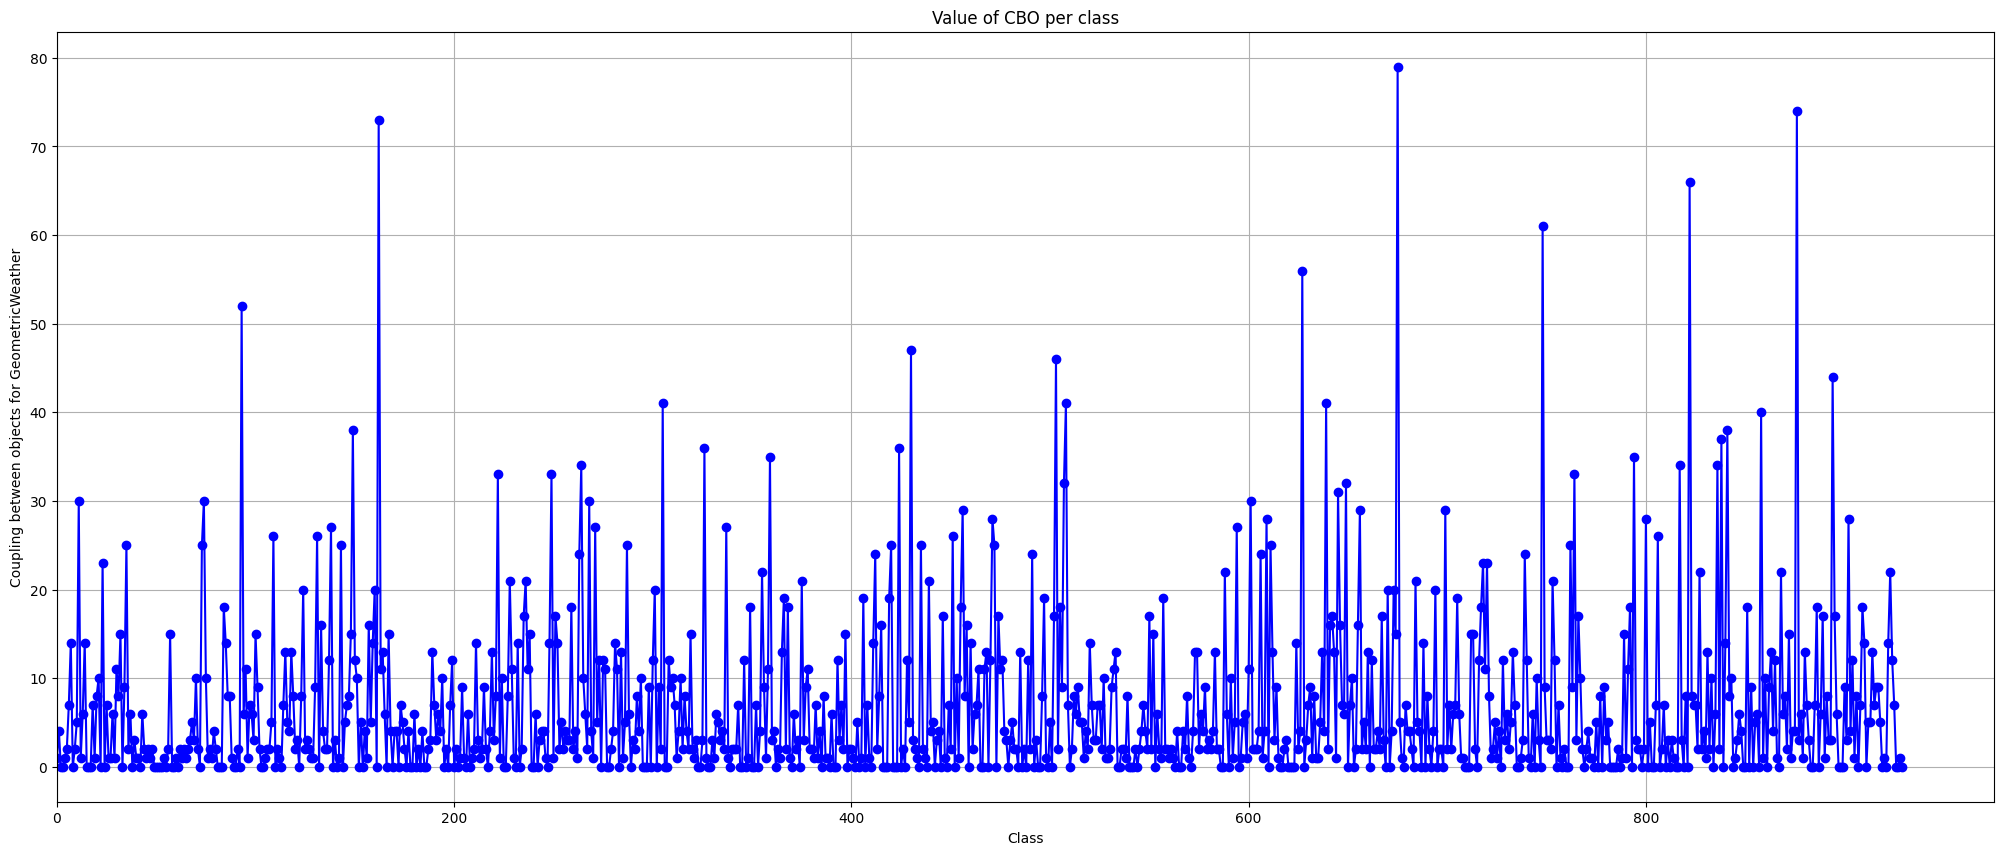

file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\lawnchair\\lawnchairclass.csv' mode='r' encoding='UTF8'>


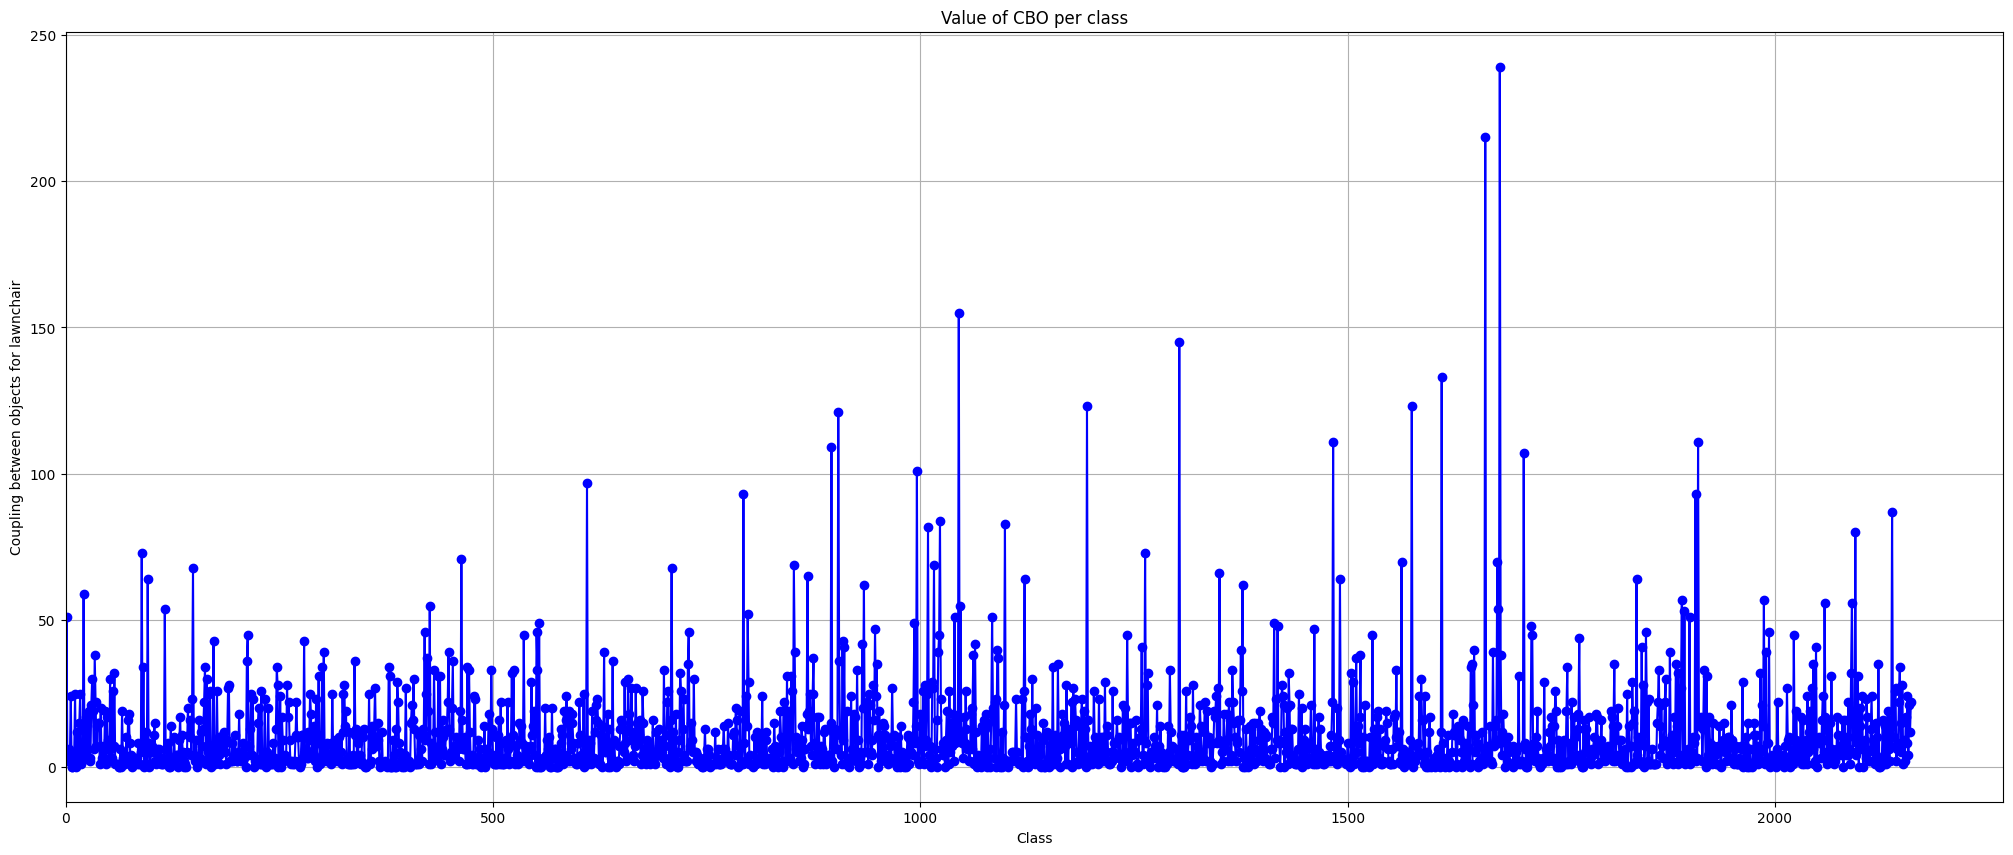

file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\lbry-android\\lbry-androidclass.csv' mode='r' encoding='UTF8'>


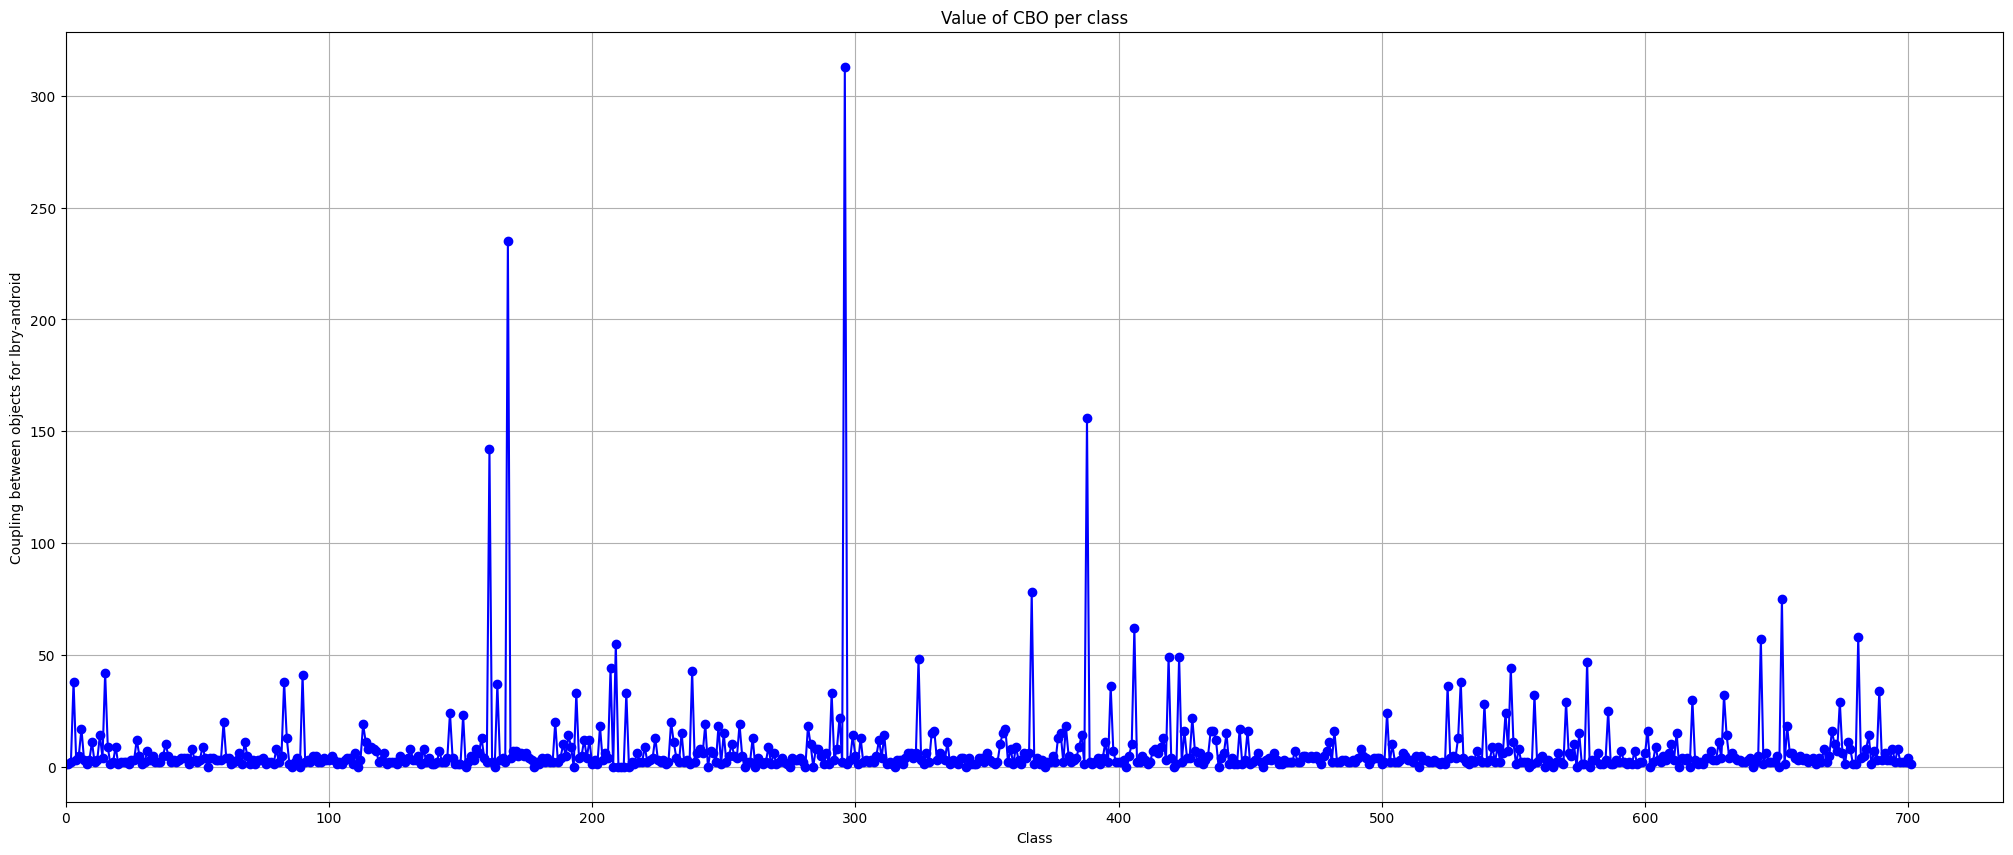

file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\litho\\lithoclass.csv' mode='r' encoding='UTF8'>


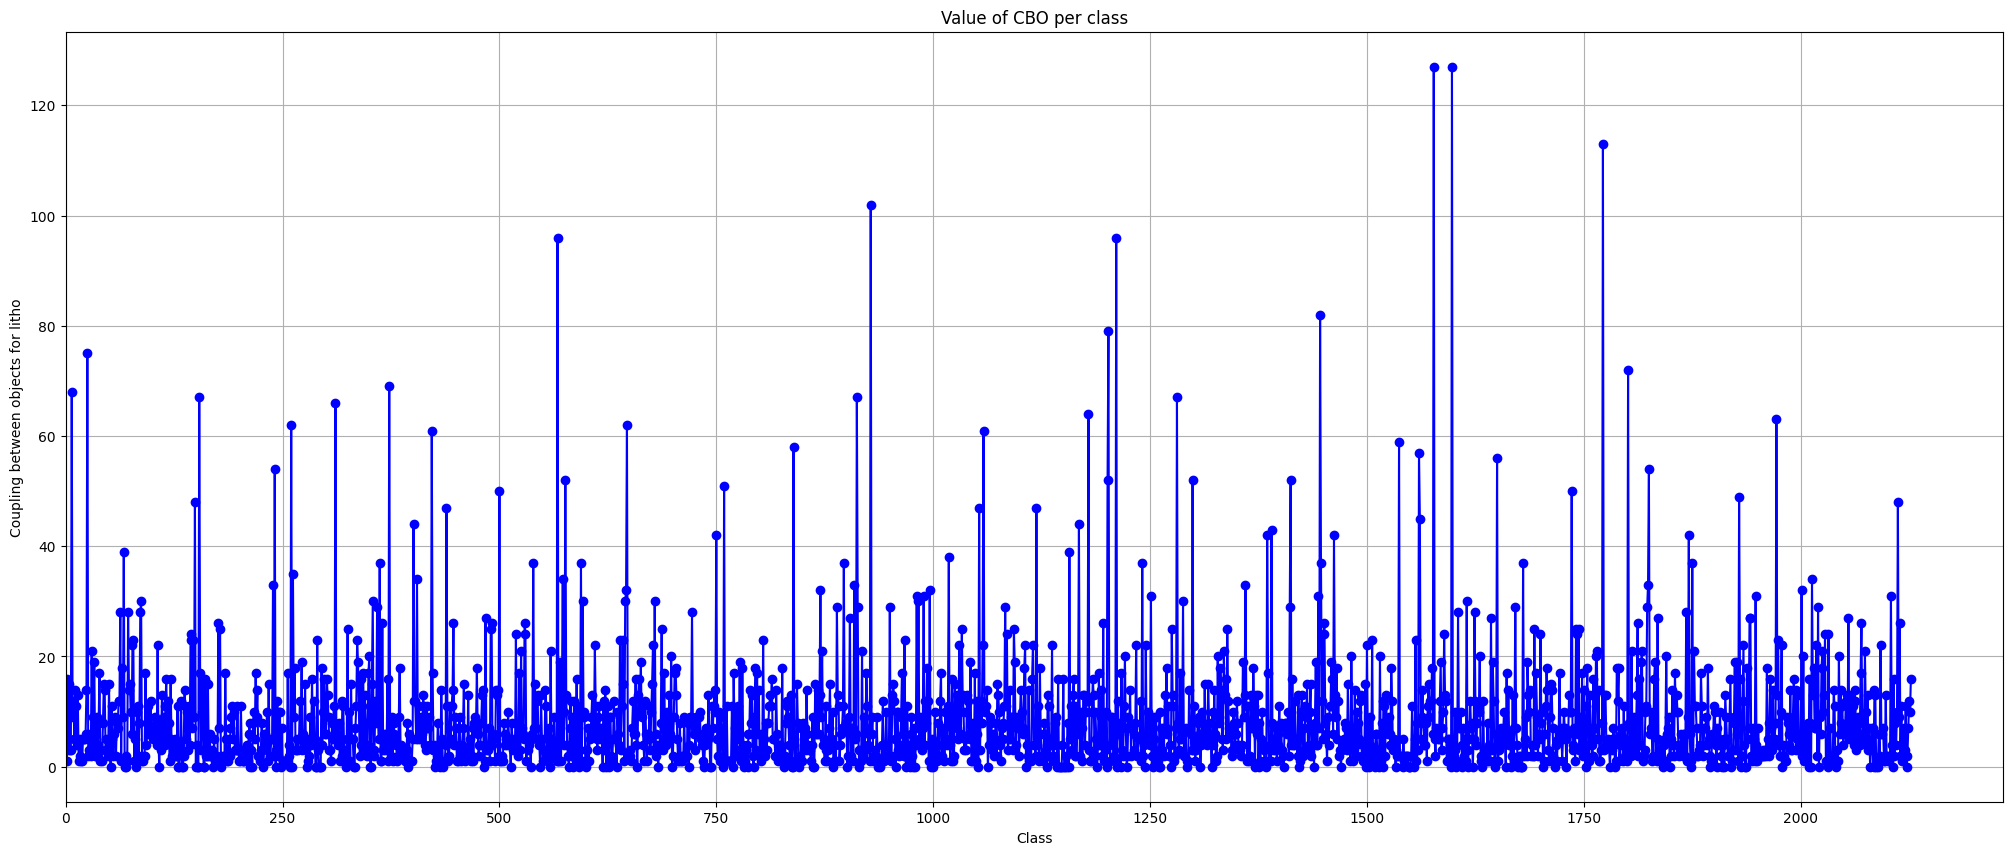

file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\PictureSelector\\PictureSelectorclass.csv' mode='r' encoding='UTF8'>


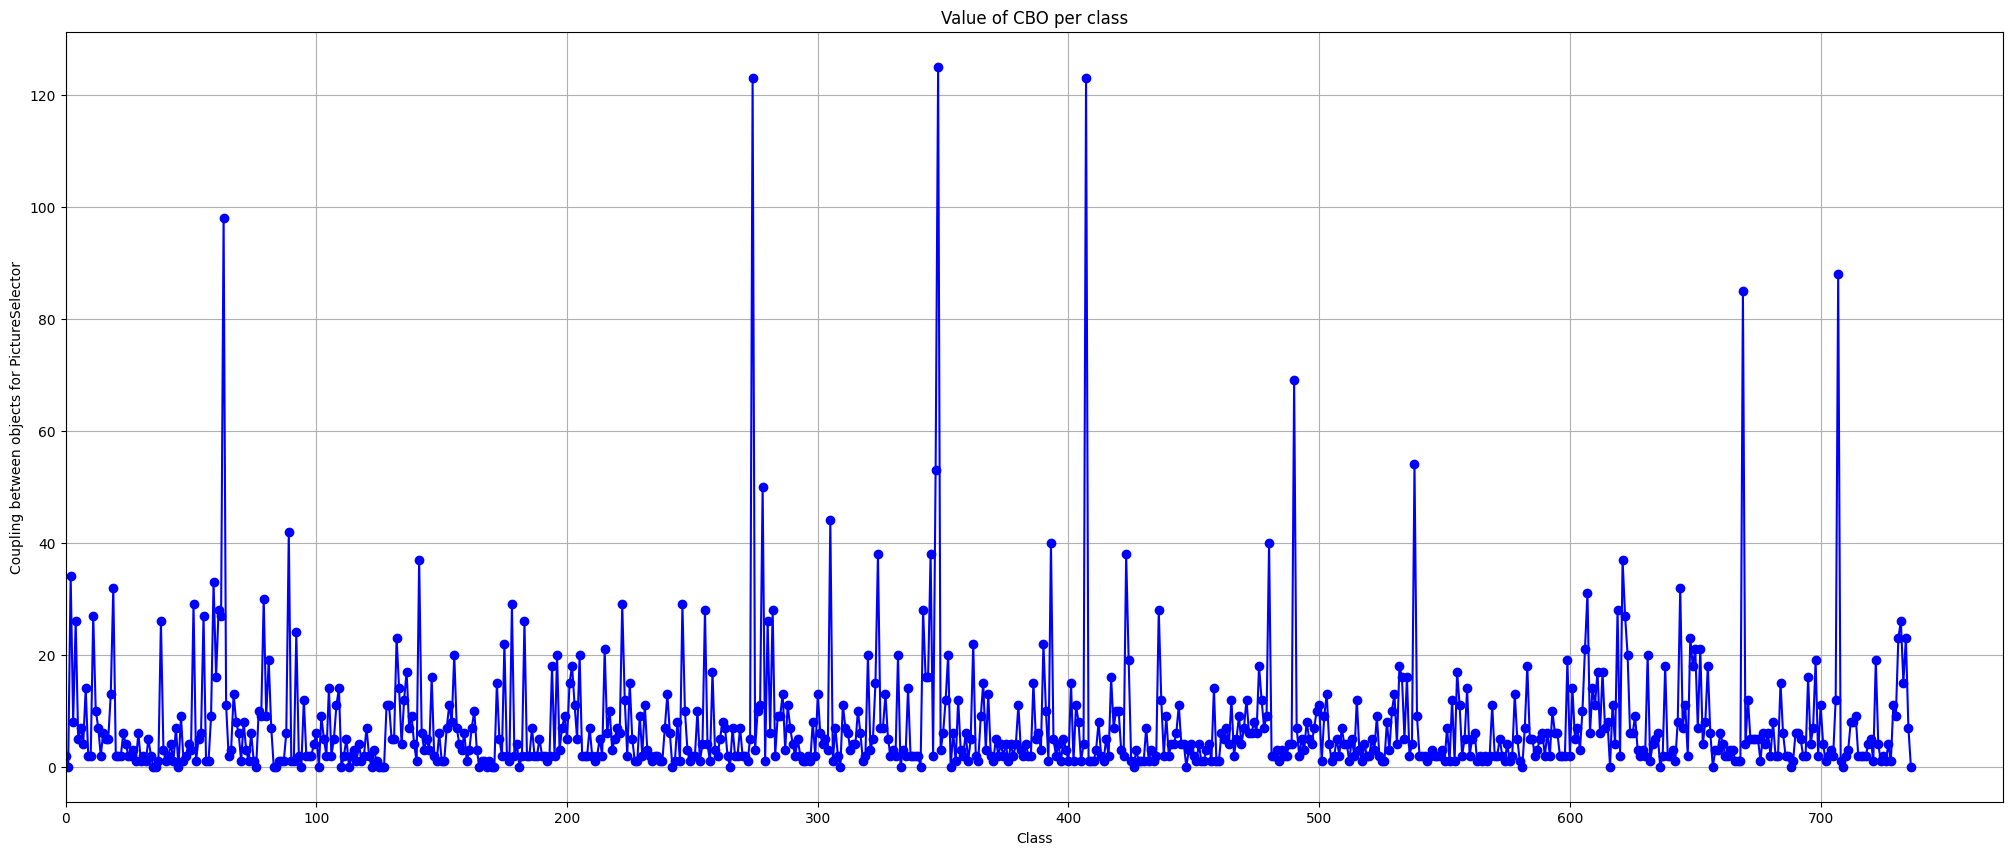

file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\SmarterStreaming\\SmarterStreamingclass.csv' mode='r' encoding='UTF8'>


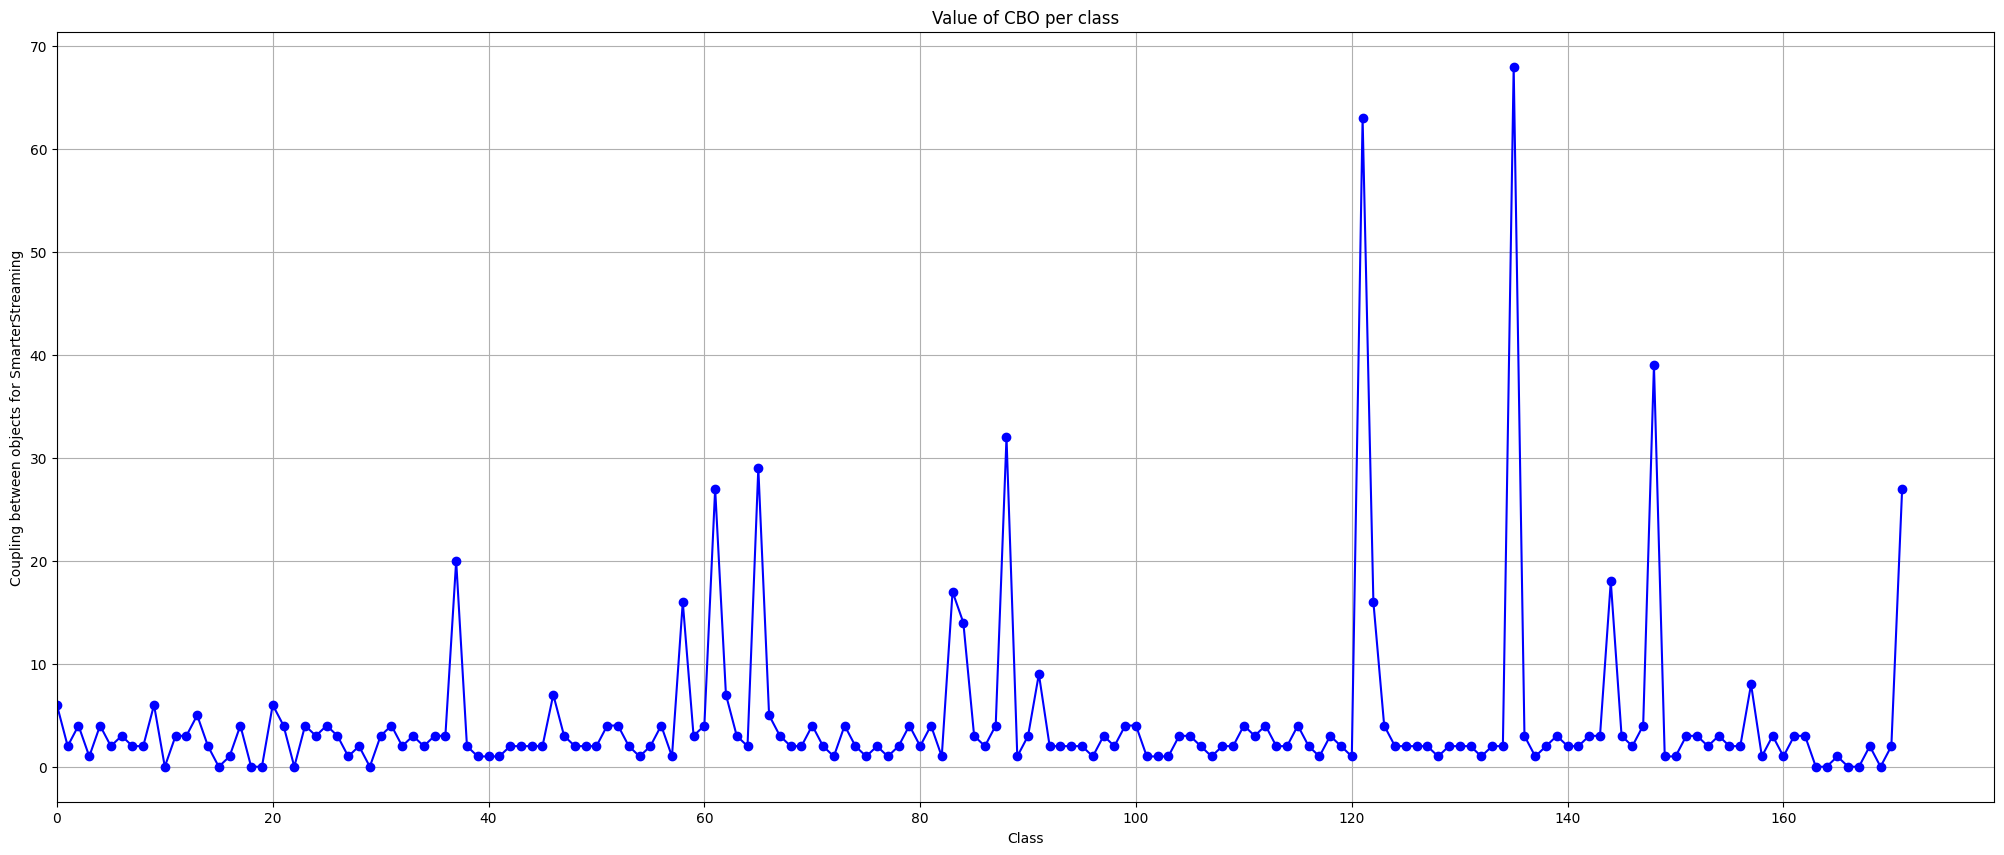

file; <_io.TextIOWrapper name='C:\\Users\\maaik\\PycharmProjects\\OssMetricScraping\\talon-for-twitter-android\\talon-for-twitter-androidclass.csv' mode='r' encoding='UTF8'>


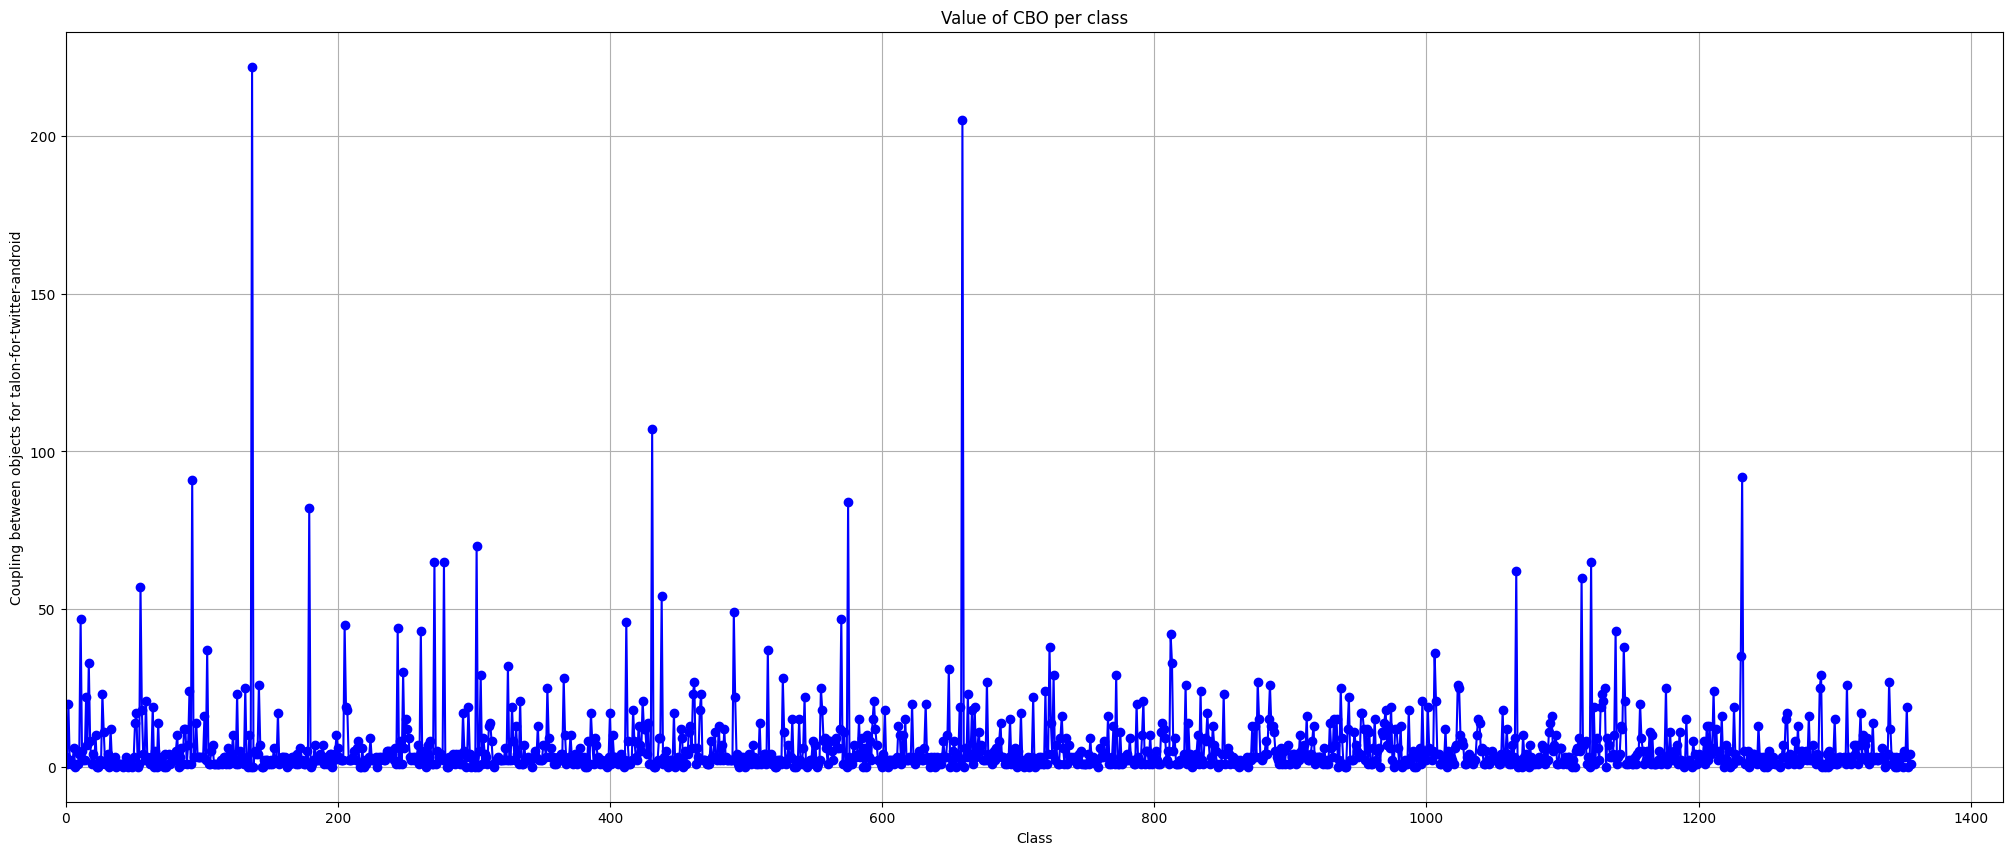

In [34]:
import csv
import os
#visualizations


import matplotlib.pyplot as plt
import json
import matplotlib.colors as mcolors

# global variable, stays the same has 0 chance to change
#chapters = list(range(1, 60))  # Chapters 1 to 14

# line chart
def line_chart(label:str, entity:str, data:list):
    """
    Plots a line chart for the entered data. 

    Parameters:
    entity (str): The character whose sentiment is being analyzed.
    data (list): List of sentiment scores corresponding to each chapter.

    This function creates a line chart with number of classes on the x-axis and value in data list the y-axis, 
    """

    plt.figure(figsize=(25, 10))
    plt.plot(list(range(len(data))) , data, marker='o', linestyle='-', color='b')
    plt.title(f'Value of {entity} per class')
    plt.xlabel('Class')
    plt.ylabel(f'{label}')
    plt.grid(True)
    
    # Setting axis limits
    plt.xlim(left=0)  # Adjust as necessary to cut off empty initial values

    
    plt.show()
    
    
# line chart for two characters 
def double_line_chart(entity1, entity2, data1, data2):
    """
    Plots a line chart comparing the sentiments of two entities over time.

    Parameters:
    entity1 (str): The first character for comparison.
    entity2 (str): The second character for comparison.
    data1 (list): List of sentiment scores for the first entity corresponding to each chapter.
    data2 (list): List of sentiment scores for the second entity corresponding to each chapter.

    This function creates a comparative line chart for two entities, showing their sentiment trends across chapters.
    """
    plt.figure(figsize=(25, 10))
    
    plt.plot(chapters, data1, marker='o', color='blue', label=entity1)
    plt.plot(chapters, data2, marker='s', color='green', label=entity2)

    plt.title(f'Sentiment of {entity1} vs {entity2} Over Time')
    plt.xlabel('Chapter')
    plt.ylabel('Data Value')
    plt.legend()
    plt.show()
    
    
# bar chart
def bar_chart(entity, data):
    """
    Plots a bar chart representing the sentiment of a specified entity over time.

    Parameters:
    entity (str): The character whose sentiment is being analyzed.
    data (list): List of sentiment scores corresponding to each chapter.

    This function creates a bar chart with chapters on the x-axis and sentiment scores on the y-axis, 
    illustrating the sentiment of the given entity across different chapters.
    """
        
    plt.bar(chapters , data)
    plt.title(f'Sentiment of {entity} Over Time')
    plt.xlabel('Chapter')
    plt.ylabel('Data Value')
    plt.show()

# heatmap
def heatmap(data, row_labels):
    """
    Plots a heatmap representing sentiments across various entities over time.

    Parameters:
    data (2D list): A 2D list of sentiment scores, where each row represents an entity and each column a chapter.
    row_labels (list): List of labels for the rows, each representing an entity.

    This function creates a heatmap to visualize the sentiment scores of various entities across different chapters, 
    using color intensity to represent sentiment magnitude.
    """
    
    fig, ax = plt.subplots(figsize=(25,10))  # Adjust the size as needed

    # Create a colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue", "green", "yellow", "red"])

    # Create the heatmap
    cax = ax.matshow(data, cmap=cmap)

    # Set axis labels
    ax.set_xticklabels([] + [i for i in range(len(data))], rotation=45, ha='left')
    ax.set_yticklabels([] + row_labels)
    
    # Set axis ticks
    ax.set_xticks(range(len(data)))
    ax.set_yticks(range(len(row_labels)))


    # Hide the gridlines based on minor ticks
    ax.grid(False)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    # Add a color bar
    plt.colorbar(cax)

    # Add title
    plt.title(f'Everyone\'s Sentiments of  Over Time')

    plt.show()
    

def data_prep(requested_projects=None):
    """
    Prepare and preprocess data for visualization.

    """
    
    projects = ["GeometricWeather", "lawnchair", "lbry-android", "litho", "PictureSelector", "SmarterStreaming", "talon-for-twitter-android"]
    project_paths: list[str] = []
    
    if requested_projects is not None:
        projects = requested_projects
    
    absolute_path = os.path.abspath(os.getcwd())

    for project in projects:
        project_path = os.path.join(absolute_path, project)
        project_paths.append(project_path)
    
        project_csv_path = os.path.join(project_path , project + "class.csv")
        with open(project_csv_path, "r", encoding="UTF8") as project_csv:
            print(f"file; {project_csv_path}\n")
            #print(project_csv.readline())
            #print("\n")
        
            
            reader = csv.reader(project_csv)
            data_list = []
            next(reader)  # Skip the header
            for idx, row in enumerate(reader, start=1):
                if len(row) > 4:
                    data_list.append(int(row[4]))
            #print("data_list; ", sorted(data_list))
            line_chart(f"Coupling between objects for {project}", "CBO", data_list)
    
    
    
        """
    Plots a line chart comparing the sentiments of two entities over time.

    Parameters:
    entity1 (str): The first character for comparison.
    entity2 (str): The second character for comparison.
    data1 (list): List of sentiment scores for the first entity corresponding to each chapter.
    data2 (list): List of sentiment scores for the second entity corresponding to each chapter.

    This function creates a comparative line chart for two entities, showing their sentiment trends across chapters.
    """

data_prep()

# # Example usages for the line and bar plots  
# line_chart('Elizabeth Bennet', data_prep(0))
# bar_chart('Lydia Bennet', data_prep(5))
# double_line_chart("Collins", "Bingley", data_prep(2), data_prep(3))
# 
# 
# 
# # example for the heatmap plot
# all_character_data = [data_prep(i) for i in range(0, 7)]
# character_as_row = ["eliza", "jane", "collins", "darcy", "bingley", "lydia", "lady c"]
# heatmap(all_character_data,character_as_row)